In [1]:
%matplotlib notebook
from libs.BinomialTree import *
from libs.BlackScholes import BlackScholes
from libs.MonteCarlo   import MonteCarloPricer
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

def europeanCall(*args, **kwargs):
    return EuropeanCall(*args, **kwargs).getPrice()

def americanCall( *args, **kwargs ):
    return AmericanCall(*args, **kwargs).getPrice()

def blackScholes( *args, **kwargs ):
    del kwargs[ 'N' ]
    return BlackScholes( *args, **kwargs ).getPrice()

def europeanPut(*args, **kwargs):
    return EuropeanPut(*args, **kwargs).getPrice()

def americanPut( *args, **kwargs ):
    return AmericanPut(*args, **kwargs).getPrice()


callParams = { 'S_0': 60, 'K': 62, 'T': 0.5, 'r': 0.06, 'volatility': 0.13, 'N': 300 }
putParams  = { 'S_0': 64, 'K': 62, 'T': 0.5, 'r': 0.06, 'volatility': 0.13, 'N': 300 }
ranges = { 'S_0': range(1, 100),
           'T'  : np.arange( 0.1, 3, 0.1 ),
           'r'  : np.arange( 0, 0.5, 0.05 ),
           'volatility': np.arange( 0.1, .5, 0.05 ) }


def plot( functions, params, title):
    mpl.style.use('seaborn')
    fig, axs = plt.subplots(2, 2, gridspec_kw={'hspace': 0.25, 'wspace': 0.25})
    fig.suptitle('C_0 - ' + title)

    coord = 0
    for param, range in ranges.items():
        for i, f in enumerate(functions):
            values = [ f( **{**params, param : r } ) for r in range ]
            axs[int(coord > 1), coord % 2].plot(range, values, 'C'+str(i+1), label=f.__name__)
            axs[int(coord > 1), coord % 2].set(xlabel=param)
            axs[int(coord > 1), coord % 2].legend()
        coord += 1

    plt.show()


<IPython.core.display.Javascript object>


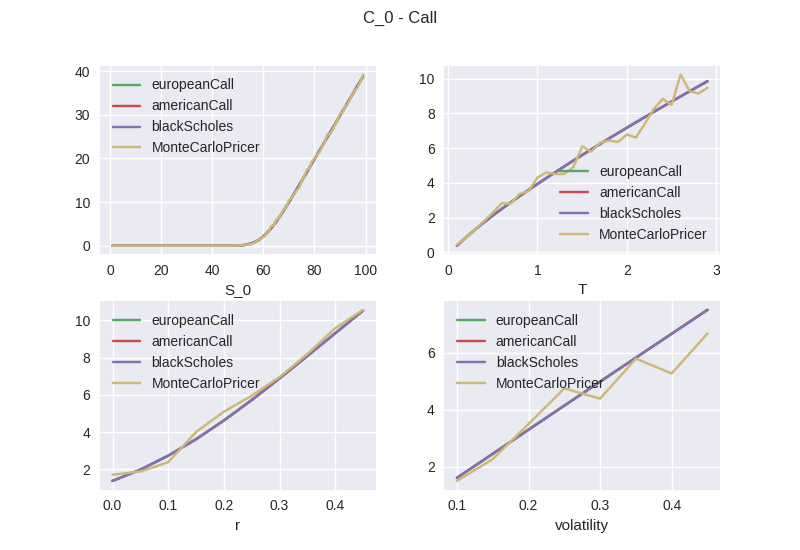

In [2]:
plot([europeanCall, americanCall, blackScholes, MonteCarloPricer], callParams, 'Call')

<IPython.core.display.Javascript object>


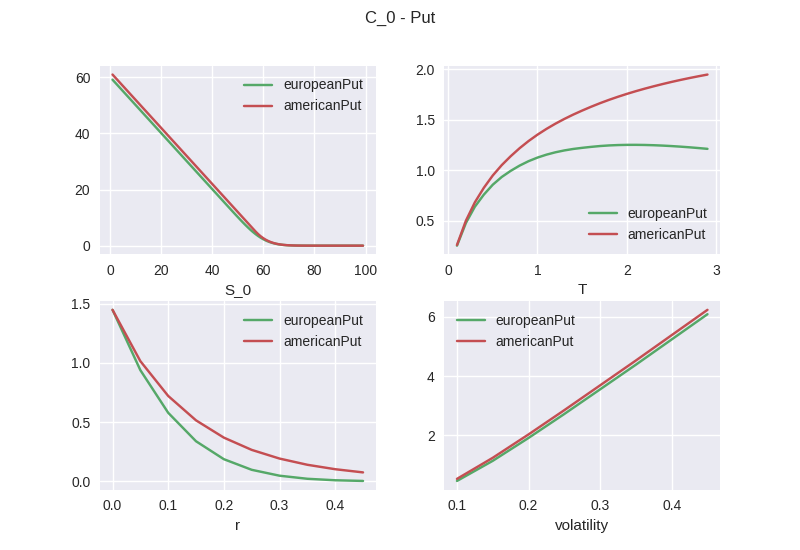

In [3]:
plot([europeanPut, americanPut], putParams, 'Put')